# Convolution Neural Network on Semeion Handwritten Digit Dataset

## Convolution Neural Network [1]

Neural Network is a non-linear model characterized by an activation function, which is used by interconnected information processing units to transform input into output. 

The layers: 
The input layer connects with hidden layer/s, which in turn connects to the output layer. 

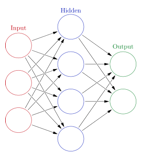

Convolutional neural network is a class of deep, feed-forward artificial neural networks that has successfully been applied to analyzing visual imagery. A CNN consists of an input and an output layer, as well as multiple hidden layers

The layers of a CNN typically consist of

1. Convolutional Layer
2. Pooling Layer 
3. Classification(Fully connected Layer)

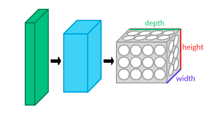
Convolution Layer: The primary purpose of Convolution layer is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data. For example, the 5x5 image below is being convoluted to 3x3 image.

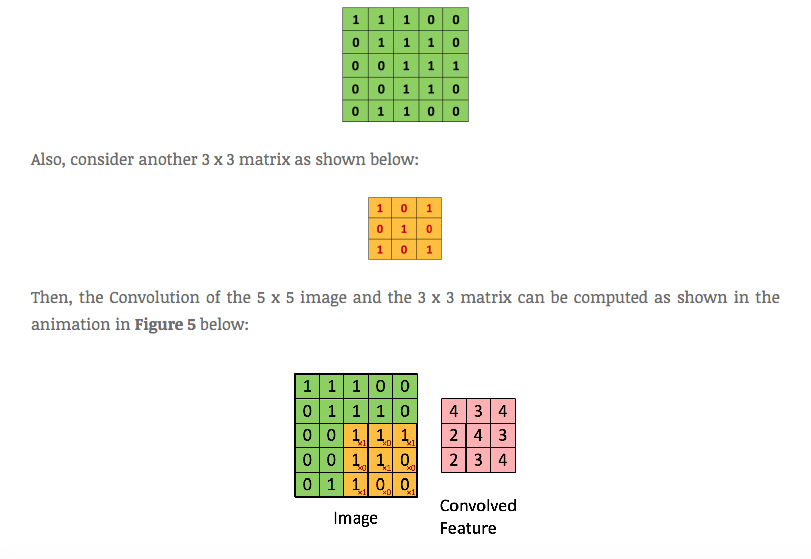

Pooling Layer: Spatial Pooling (also called subsampling or down-sampling) reduces the dimensionality of each feature map but retains the most important information, for example,below we are doing max pooling.

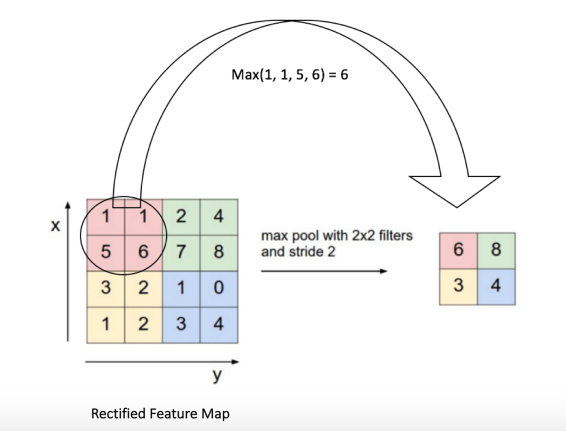

Fully Connected Layer: The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset. Apart from classification, adding a fully-connected layer is also a (usually) cheap way of learning non-linear combinations of these features. Most of the features from convolutional and pooling layers may be good for the classification task, but combinations of those features might be even better. For example, the image classification task we set out to perform below has four possible outputs.

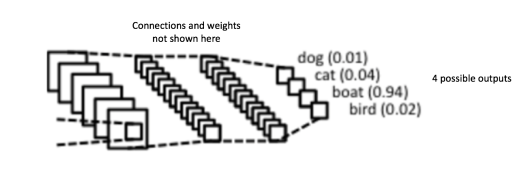

### Pre-processing

In [25]:
import pandas as pd
import numpy as np
import pylab
from random import shuffle
import time
import keras
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Flatten,Dropout
from keras.optimizers import Adadelta , RMSprop , SGD
import matplotlib.pyplot as plt

The following is function to read your dataset.

In [26]:
def read_data_semeion(fname='Semeion/semeion.data.txt'): #put the name of the file that contains your dataset
    file = open(fname, 'r')
    lines = file.readlines()                             #reads the entire data and put it in a variable

    #Place your image size. For example if the image has 256 pixels=16x16, width=16, height=16
    width = 16                                           
    height = 16
    size = width * height
    classes = 10                                        #put the number of classes of your classification

    images = []
    labels = []

    for line in lines:
        data = line.split(' ')                         #makes an array of individual values of a line
        image = []
        label = []

        for i in range(0, size):
            image.append(int(float(data[i])))         #puts all the pixel data of the image into the array image
        images.append(image)                          #add the image to the collection of images

        for i in range(size, size + classes):
            label.append(int(float(data[i])))         #puts the label data of the image into the array label
        labels.append(label)                          #add the label to the collection of labels

    # Shuffle data
    images_shuffle = []
    labels_shuffle = []
    indexes = list(range(len(images)))
    shuffle(indexes)
    for i in indexes:
        images_shuffle.append(images[i])              #shuffle images data
        labels_shuffle.append(labels[i])              #shuffle labels data

    images = images_shuffle
    labels = labels_shuffle

    images = np.array(images,dtype=np.uint8)        # convert the lables and images to uint8 type
    labels = np.array(labels, dtype=np.uint8)

    return images, labels

### Parameters(for Hyper-tuning ) [2] [3] [4]

Here we are setting the hyper-parameters, so lets define them first:
1. batch_size: the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
2. filters: number of filters in each hidden layer
3. epochs:number of epochs where one epoch = one forward pass and one backward pass of all the training examples
4. Activation function(activation,final_layer_activation): It’s just a thing (node) that you add to the output end of any neural network. It is also known as Transfer Function. It can also be attached in between two Neural Networks. It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc.(depending upon the function). eg.: relu, tanh, softmax etc.
5. Dropout(d1,d2): Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.
6. compile_loss:A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a model, helps with the calculation of model losses. eg. mse, cross-entropy etc.
7. learning_rate: Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge — especially if we get stuck on a plateau region. Also, if we take a higher value of learning rate, it might result in overfitting of the model as less number of points will be considered.
8. optimizer:An optimizer is one of the two arguments required for compiling a model, helps with calculation of gradients for the model. eg. SGD, Adadelta etc.
9. split: test-train split of data. example: 0.33=split data as 33% test data, 67% train data
10. classes: number of classes in your classification

In [23]:
#Creating parameters and assigning values
batch_size = 128                         #set batch size
filters = 32                             #set number of filters for hidden layers
epochs = 40                              #set number of epochs
activation = 'relu'                      #set activation function for all hidden layers
final_layer_activation = 'softmax'       #set activation function for output layer
d1 = 0.2                                 #value for dropout layer 1
d2 = 0.2                                 #value for dropout layer 2
compile_loss = keras.losses.categorical_crossentropy  #set the loss function
learning_rate = 0.15                                  #set the optimal learning rate
optimizer = Adadelta(lr=learning_rate)                #set the appropriate optimizer with the learning rate
split = 0.33                                          #split the data into train-test

classes = 10;                                         #assign number of classes
im_shape = (256,1)
images , labels  = read_data_semeion()                #get the separated values of images and labels for each object
images = images.reshape(images.shape[0], *im_shape)   #reshape the image data for input layer

### Creating CNN models

Below c:Convolution Layer, mp:Max Pooling Layer,fc:Fully Connected Layer, f=Flatten Function, d=Dropout Function

#### Model 1

In [24]:
 #Model shape c-c-mp-d-mp-f-fc-d-fc
 
 #Creating the model
 cnn_model1 = Sequential([
     Conv1D(filters=filters, kernel_size=3, activation=activation,input_shape=im_shape), #Convolution Layer 1
     Conv1D(filters=filters, kernel_size=3, activation=activation, input_shape=im_shape),#Convolution Layer 2
     MaxPooling1D(pool_size=2),  #Maxpooling Layer 1                                                        
     Dropout(d1),                #Dropout Fuction
     MaxPooling1D(pool_size=2),  #Maxpooling Layer 2
     Flatten(),                  #Flatten Fuction
     Dense(128, activation=activation), #Fully Connected Layer
     Dropout(d2),                #Dropout Fuction
     Dense(classes, activation=final_layer_activation) # Output(Fully Connected Layer)
 ])
 
 #Compliling the model   
 cnn_model1.compile(
     loss=compile_loss,          #assign the loss function
     optimizer=optimizer,        #assign the optimizer function
     metrics=['accuracy']        #make the model calculate accuracy as well
 )

start = time.time()   
 #Fitting the Model   
 history = cnn_model1.fit(
     images, labels, validation_split=split, batch_size=batch_size,
     epochs=epochs, verbose=1,
 )
print ('compilation time : ', time.time() - start) #calculate time to fit the model

Train on 1067 samples, validate on 526 samples
Epoch 1/40
1067/1067 [==============================] - 3s 3ms/step - loss: 2.2755 - acc: 0.1837 - val_loss: 2.2271 - val_acc: 0.3669
Epoch 2/40
1067/1067 [==============================] - 1s 742us/step - loss: 2.1896 - acc: 0.3571 - val_loss: 2.1198 - val_acc: 0.5627
Epoch 3/40
1067/1067 [==============================] - 1s 737us/step - loss: 2.0502 - acc: 0.4977 - val_loss: 1.9578 - val_acc: 0.5875
Epoch 4/40
1067/1067 [==============================] - 1s 734us/step - loss: 1.8348 - acc: 0.5820 - val_loss: 1.7057 - val_acc: 0.6863
Epoch 5/40
1067/1067 [==============================] - 1s 729us/step - loss: 1.5150 - acc: 0.6645 - val_loss: 1.3680 - val_acc: 0.7452
Epoch 6/40
1067/1067 [==============================] - 1s 740us/step - loss: 1.1883 - acc: 0.7235 - val_loss: 1.0509 - val_acc: 0.8042
Epoch 7/40
1067/1067 [==============================] - 1s 740us/step - loss: 0.8928 - acc: 0.7694 - val_loss: 0.8122 - val_acc: 0.8194
Epo

#### Evaluating Model 1

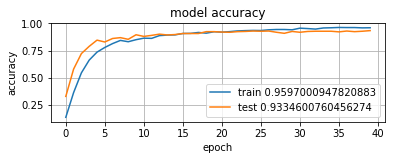

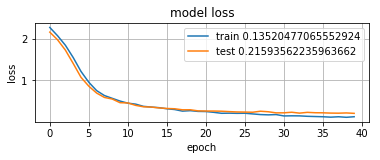

In [15]:
# Getting the accuracies and losses from the output
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plotting the accuracy graph
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train '+ str(acc[-1]), 'test '+str(val_acc[-1])], loc='lower right')
plt.grid(True)
plt.show()

#Plotting the loss graph
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train '+str(loss[-1]), 'test '+str(val_loss[-1])], loc='upper right')
plt.grid(True)
plt.show()

#### Model 2

In [ ]:
 #Model shape c-mp-d-c-mp-f-fc-d-fc
 
 #Creating the model
cnn_model2 = Sequential([
     Conv1D(filters=filters, kernel_size=3, activation=activation,input_shape=im_shape), #Convolution Layer 1
     MaxPooling1D(pool_size=2), #Maxpooling Layer 1
     Dropout(d1),                #Dropout Fuction
     Conv1D(filters=filters, kernel_size=3, activation=activation, input_shape=im_shape), #Convolution Layer 2
     MaxPooling1D(pool_size=2), #Maxpooling Layer 2
     Flatten(),                  #Flatten Fuction
     Dense(128, activation=activation), #Fully Connected Layer
     Dropout(d2),                #Dropout Fuction
     Dense(classes, activation=final_layer_activation) # Output(Fully Connected Layer)
 ]) 

  #Compliling the model   
cnn_model2.compile(
     loss=compile_loss,    #assign the loss function
     optimizer=optimizer,  #assign the optimizer function
     metrics=['accuracy']  #make the model calculate accuracy as well
 )

start = time.time()
#Fitting the Model
history = cnn_model2.fit(
     images, labels, validation_split=split, batch_size=batch_size,
     epochs=epochs, verbose=1,
 )
print ('compilation time : ', time.time() - start) #calculate time to fit the model

#### Evaluating Model 2

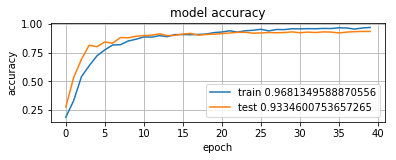

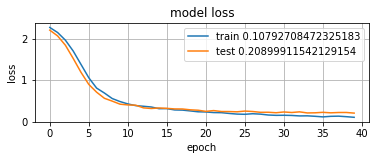

In [17]:
# Getting the accuracies and losses from the output
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plotting the accuracy graph
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train '+ str(acc[-1]), 'test '+str(val_acc[-1])], loc='lower right')
plt.grid(True)
plt.show()

#Plotting the loss graph
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train '+str(loss[-1]), 'test '+str(val_loss[-1])], loc='upper right')
plt.grid(True)
plt.show()

#### Model 3

In [18]:
 #Model shape c-mp-c-mp-d-c-mp-f-fc-d-fc-fc
 
 #Creating the model
cnn_model3 = Sequential([
    Conv1D(filters=filters, kernel_size=3, activation=activation,input_shape=im_shape), #Convolution Layer 1
    MaxPooling1D(pool_size=2), #Maxpooling Layer 1
    Conv1D(filters=filters, kernel_size=3, activation=activation,input_shape=im_shape), #Convolution Layer 2
    MaxPooling1D(pool_size=2), #Maxpooling Layer 1
    Dropout(d1),                #Dropout Fuction
    Conv1D(filters=filters, kernel_size=3, activation=activation, input_shape=im_shape), #Convolution Layer 3
    MaxPooling1D(pool_size=2), #Maxpooling Layer 1
    Flatten(),                  #Flatten Fuction
    Dense(128, activation=activation), #Fully Connected Layer
    Dropout(d2),                #Dropout Fuction
    Dense(50, activation=activation), #Fully Connected Layer
    Dense(classes, activation=final_layer_activation) # Output(Fully Connected Layer)
])

 #Compliling the model   
cnn_model3.compile(
    loss=compile_loss,     #assign the loss function
    optimizer=optimizer,   #assign the optimizer function
    metrics=['accuracy']   #make the model calculate accuracy as well
)

start = time.time()
 #Fitting the Model
history = cnn_model3.fit(
    images, labels, validation_split=split, batch_size=batch_size,
    epochs=epochs, verbose=1,
)
print ('compilation time : ', time.time() - start)    #calculate time to fit the model

Train on 1067 samples, validate on 526 samples
Epoch 1/40
1067/1067 [==============================] - 3s 2ms/step - loss: 2.3025 - acc: 0.1181 - val_loss: 2.2848 - val_acc: 0.1882
Epoch 2/40
1067/1067 [==============================] - 1s 644us/step - loss: 2.2739 - acc: 0.1537 - val_loss: 2.2496 - val_acc: 0.2529
Epoch 3/40
1067/1067 [==============================] - 1s 636us/step - loss: 2.2348 - acc: 0.2296 - val_loss: 2.2047 - val_acc: 0.3764
Epoch 4/40
1067/1067 [==============================] - 1s 616us/step - loss: 2.1950 - acc: 0.2465 - val_loss: 2.1411 - val_acc: 0.4278
Epoch 5/40
1067/1067 [==============================] - 1s 695us/step - loss: 2.1105 - acc: 0.3477 - val_loss: 2.0326 - val_acc: 0.5475
Epoch 6/40
1067/1067 [==============================] - 1s 651us/step - loss: 1.9888 - acc: 0.4264 - val_loss: 1.8563 - val_acc: 0.5589
Epoch 7/40
1067/1067 [==============================] - 1s 653us/step - loss: 1.8166 - acc: 0.4667 - val_loss: 1.5832 - val_acc: 0.6426
Epo

#### Evaluating Model 3

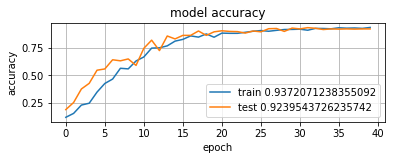

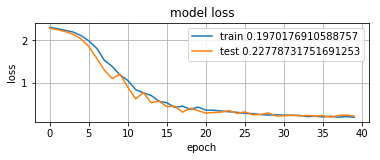

In [19]:
# Getting the accuracies and losses from the output
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#plotting the accuracy graph
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train '+ str(acc[-1]), 'test '+str(val_acc[-1])], loc='lower right')
plt.grid(True)
plt.show()

#Plotting the loss graph
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train '+str(loss[-1]), 'test '+str(val_loss[-1])], loc='upper right')
plt.grid(True)
plt.show()

In this way you can create models(by adding diffrent hidden layers or changing the order of the hidden layers), compare diffrent models and choose the best one to apply on your dataset.
As you can see from above example, for the above mentioned parameters Model 2 has the better accuracy and less processing time as you can see from the graphs.This can vary for diffrent parameters. Also, the above mentioned graphs also show that more number of hidden layers doesn't necessarily mean better performane, hence you should always try to find the optimal number of hidden layers for your model.

# t-SNE(t-distributed stochastic neighbor embedding) for clustering Semeion Handwritten Digit Dataset 

### t-SNE(t-distributed stochastic neighbor embedding) [6]

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets. Here we have used it to cluster the images of the same digit.

The t-SNE is implementation of the Stochastic Neighbor Embedding. SNE starts by converting the high-dimensional Euclidean dis- tances between datapoints into conditional probabilities that represent similarities.1 The similarity of datapoint x j to datapoint xi is the conditional probability, p j|i, that xi would pick x j as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at xi. For nearby datapoints, pj|i is relatively high, whereas for widely separated datapoints, pj|i will be almost infinitesimal (for reasonable values of the variance of the Gaussian, σi). Mathematically, the conditional probability p j|i is given by
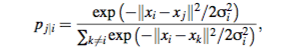
where σi is the variance of the Gaussian that is centered on datapoint xi. The method for determining
the value of σi is presented later in this section. Because we are only interested in modeling pairwise
similarities, we set the value of pi|i to zero. For the low-dimensional counterparts yi and yj of the
high-dimensional datapoints xi and xj, it is possible to compute a similar conditional probability,
which we denote by qj|i. We set2 the variance of the Gaussian that is employed in the computation
of the conditional probabilities q to 1 . Hence, we model the similarity of map point y to map j|i √2 j
point yi by   
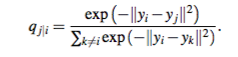
Again, since we are only interested in modeling pairwise similarities, we set qi|i = 0.
If the map points yi and yj correctly model the similarity between the high-dimensional data- points xi and xj, the conditional probabilities pj|i and qj|i will be equal. Motivated by this observa- tion, SNE aims to find a low-dimensional data representation that minimizes the mismatch between p j|i and q j|i . A natural measure of the faithfulness with which q j|i models p j|i is the Kullback- Leibler divergence (which is in this case equal to the cross-entropy up to an additive constant). SNE minimizes the sum of Kullback-Leibler divergences over all datapoints using a gradient descent method. The cost function C is given by
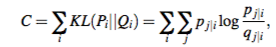
in which Pi represents the conditional probability distribution over all other datapoints given data- point xi, and Qi represents the conditional probability distribution over all other map points given map point yi.

t-SNE follows the following algorithm which has been implemented:

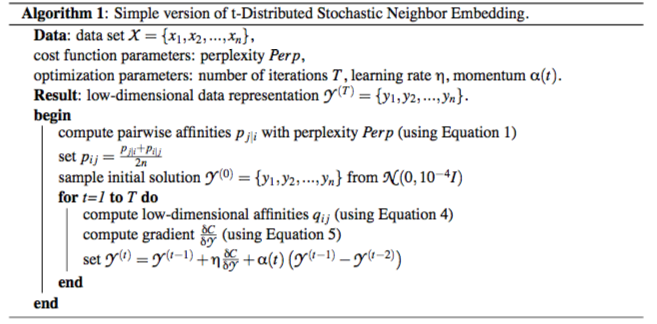

### Pre-processing

Using the read_data_semeion function get the separated values of the images and labels.

In [27]:
#extract images and labels data
images , labels  = read_data_semeion()

In [28]:
#put the label data in a dataframe
df=pd.DataFrame(labels)
print(df)

      0  1  2  3  4  5  6  7  8  9
0     0  0  0  1  0  0  0  0  0  0
1     0  0  0  0  0  0  1  0  0  0
2     0  0  0  0  0  0  0  0  1  0
3     0  0  1  0  0  0  0  0  0  0
4     1  0  0  0  0  0  0  0  0  0
5     0  0  0  0  1  0  0  0  0  0
6     1  0  0  0  0  0  0  0  0  0
7     0  0  0  0  1  0  0  0  0  0
8     0  0  0  0  1  0  0  0  0  0
9     0  0  0  0  1  0  0  0  0  0
10    0  0  0  0  0  1  0  0  0  0
11    0  0  0  0  0  0  0  0  1  0
12    0  0  0  1  0  0  0  0  0  0
13    0  0  0  1  0  0  0  0  0  0
14    0  0  1  0  0  0  0  0  0  0
15    0  0  0  0  0  1  0  0  0  0
16    1  0  0  0  0  0  0  0  0  0
17    0  0  1  0  0  0  0  0  0  0
18    1  0  0  0  0  0  0  0  0  0
19    0  0  0  0  0  0  0  0  1  0
20    0  0  1  0  0  0  0  0  0  0
21    0  0  0  0  0  1  0  0  0  0
22    0  0  1  0  0  0  0  0  0  0
23    1  0  0  0  0  0  0  0  0  0
24    0  0  0  1  0  0  0  0  0  0
25    0  1  0  0  0  0  0  0  0  0
26    0  0  0  0  0  0  0  0  0  1
27    0  0  0  0  1 

In the Dataset the data of label is one-hot encoded, example: 0 is in the form of [1 0 0 0 0 0 0 0 0 0], however, for our input we need it in the form of 0 only, hence we are reversing this one-hot encoding.

In [29]:
#reverse the one-hot-encoding on the labels data
def get_label(row):
    for c in df.columns:
        if row[c]==1:
            return c
        
df2=df.apply(get_label, axis=1)
np.savetxt(r'labels.txt', df2.values, fmt='%d') #saving it in labels.txt file


### Implementing t-SNE [5]

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on the dataset.
Running example on 1,500 Semeion digits...
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1593...
Computing P-values for point 500 of 1593...
Computing P-values for point 1000 of 1593...
Computing P-values for point 1500 of 1593...
Mean value of sigma: 2.259405
Iteration 10: error is 21.822941
Iteration 20: error is 19.206989
Iteration 30: error is 16.954301
Iteration 40: error is 16.313324
Iteration 50: error is 16.187190
Iteration 60: error is 16.181793
Iteration 70: error is 16.196919
Iteration 80: error is 16.213511
Iteration 90: error is 16.225387
Iteration 100: error is 16.232569
Iteration 110: error is 2.314719
Iteration 120: error is 1.918015
Iteration 130: error is 1.673708
Iteration 140: error is 1.515199
Iteration 150: error is 1.404939
Iteration 160: error is 1.324210
Iteration 170: error is 1.263246
Iteration 180: error is 1.216196
Iteration 190

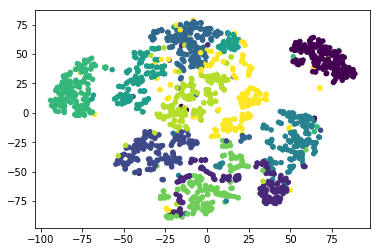

In [30]:
def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])                       #calling the Hbeta function

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])              #Calling the Hbeta function
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real   #calling pca function
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)                 #calling x2p function, Calculating P(compute pairwise affinities pj|i with perplexity Perp)
    P = P + np.transpose(P)                      
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)                    

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)              #Calculating Q(compute low dimensional affinities qj|i)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))                    #Re-arranging datapoints

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))       #Calculating cost function
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y                                                    #Re-arranged datapoints


#Main function
if __name__ == "__main__":
    print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on the dataset.")
    print("Running example on 1,500 Semeion digits...")
    X = images                         #put images data
    labels = np.loadtxt("labels.txt")  #put labels data
    Y = tsne(X, 2, 50, 20.0)           #implement tsne
    pylab.scatter(Y[:, 0], Y[:, 1], 20,labels) #Scatterplot the results
    pylab.show()

As you can see above we were able to cluster all the digit images with an error rate of 0.92%

# References

1. https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
2. https://keras.io/
3. https://towardsdatascience.com/
4. https://www.wikipedia.org
5. https://lvdmaaten.github.io/tsne/
6. L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9(Nov):2579-2605, 2008.

# License

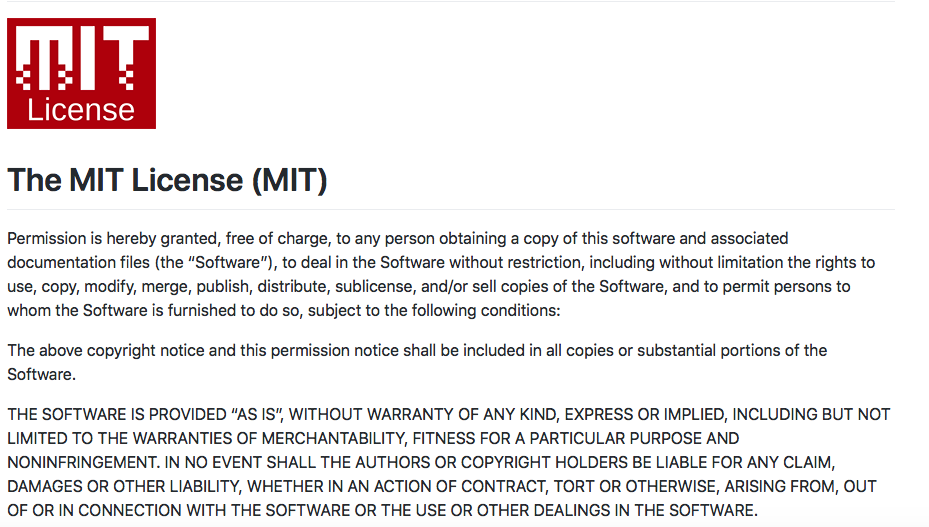